In [1]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt

## 2019/04/09 plot Energy terms if vs Structure  at one graph for f3 state

In [2]:
#import data files
filepath='/Users/PC/Dropbox/cai/btype_cco/crg_data/quick_run_mdlip/free_no_water/all_ms_E_f3.xlsx'
file = pandas.read_excel(filepath, sheetname=None, index_col=1)

minEms=[]
#E[-4]-E[-3]
deltaE=[]
deltaselfE=[]
deltapw=[]
deltamfe=[]
strucs=[]
E3=[]
E4=[]
E3_crgstate=[]
E4_crgstate=[]
for name, sheet in file.items():
    sheet=sheet.iloc[:7]
    strucs.append(name)
    E3.append(sheet['Min_E(Kcal)'][2])
    E4.append(sheet['Min_E(Kcal)'][1])
    E3_crgstate.append(sheet['Crg_seq'][2])
    E4_crgstate.append(sheet['Crg_seq'][1])
    deltaE.append(sheet['Min_E(Kcal)'][1]-sheet['Min_E(Kcal)'][2])
    deltaselfE.append(sheet['E_self(Kcal)'][1]-sheet['E_self(Kcal)'][2])
    deltapw.append(sheet['E_pw(Kcal)'][1]-sheet['E_pw(Kcal)'][2])
    deltamfe.append((sheet['E_mfe(Kcal)'][1]-sheet['E_mfe(Kcal)'][2])*2)
    #print(sheet)


In [3]:
#get the proton site change for each structure
#print(E3_crgstate)
#print(E4_crgstate)
diff_crgstate=[]

#fuction to read crg_seq from string into crg set
def crgstringtolist(crg_s: str)->list:
    n=len(crg_s)
    i=0
    res=[]
    while i < n:
        if crg_s[i]=='1':
            res.append(1)
            i +=1
        elif crg_s[i]=='0':
            res.append(0)
            i +=1
        else:
            res.append(int(crg_s[i:i+2]))
            i +=2
    return res


for i in range(len(E3_crgstate)):
    E3_crglist=crgstringtolist(E3_crgstate[i])
    E4_crglist=crgstringtolist(E4_crgstate[i])
    diff_list=[x1 - x2 for (x1, x2) in zip(E3_crglist, E4_crglist)]
    diff_crgstate.append(''.join(str(x) for x in diff_list))
print(diff_crgstate)

['001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '01-1010', '000100', '000100', '000010', '010000', '000001', '001000', '001000', '001000', '001000', '001000', '001000', '000010', '001000', '0101-10', '0101-10', '000010', '000100', '000100', '001000', '000010', '000010', '001000', '010000', '010000', '000010', '000010', '010000', '010000', '000100', '010000', '000010', '001000', '001000', '001000', '010000', '001000', '001000', '001000', '001000']


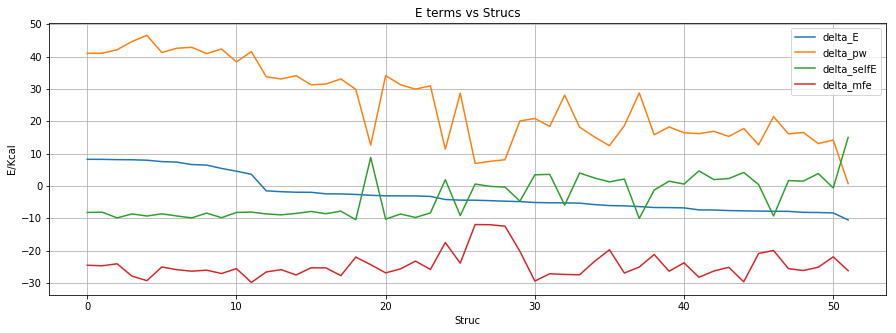

In [4]:
#plot the Energy terms vs structure
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

#marker= ['^','o','v','X','s','*','<']
x_label=strucs

plt.figure()
plt.figure(figsize=(15, 5))
#plt.xticks(list(range(len(strucs))),x_label)
data=[strucs, E3, E4, deltaE,deltapw, deltaselfE, deltamfe]
#print(list(zip(*data)))
sorted_data=sorted(list(zip(*data)), key= lambda x: x[3], reverse=True)
#print(sorted_data)
sorted_data=list(zip(*sorted_data))
labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
for i,datai in enumerate(sorted_data[3:]):    
    plt.plot(datai,label= labels[i], alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True)
plt.show()

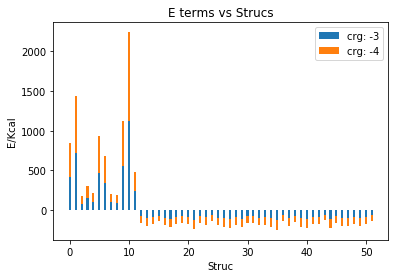

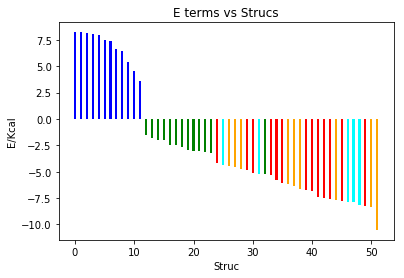

In [6]:
labels=["-3", "-4"]
width=0.35
#print(sorted_data[1:3][0][0],sorted_data[1:3][1][0] )
p1 = plt.bar(list(range(len(sorted_data[1]))), sorted_data[1], width)
p2 = plt.bar(list(range(len(sorted_data[2]))), sorted_data[2], width, sorted_data[1] )
plt.legend((p1[0], p2[0]), ('crg: -3', 'crg: -4'))
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
#plt.grid(True)
plt.show()


##color each structure
color_map={"p10": "orange", "dddro": "orange", "p20": "red", "pddro": "red", "p30": "green", "ppdro": "green",\
           "p40": "cyan","dpdro": "cyan"}
colors=[]
for j in range(len(sorted_data[0])):
    for key, value in color_map.items(): 
        if key in sorted_data[0][j]:
            colors.append(value)
            break
    if all(key not in sorted_data[0][j] for key in color_map):
        colors.append("blue")
#print(colors)
outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"
#another way to show gap
labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
plt.bar(list(range(len(sorted_data[3]))), sorted_data[3], width, color=colors)
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
#plt.grid(True)
plt.savefig(outputpathway+'/'+'All_strucs_dE_ba3_f3.png', dpi=300)
plt.show()



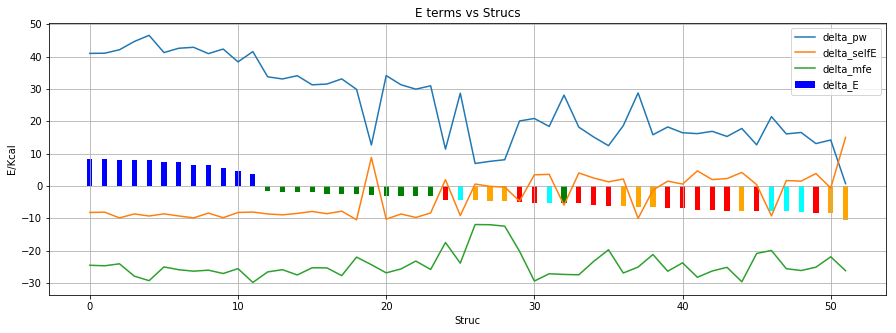

In [7]:
#plot deltaE with detailed energy terms
outputpathway=r"C:\Users\PC\Dropbox\cai\btype_cco\crg_data\quick_run_mdlip"

plt.figure()
plt.figure(figsize=(15, 5))
plt.bar(list(range(len(sorted_data[3]))), sorted_data[3], width, label= labels[0], color=colors)
for i,datai in enumerate(sorted_data[4:]):    
    plt.plot(datai, label= labels[i+1],alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True)
plt.savefig(outputpathway+'/'+'All_strucs_E_ba3_f3.png', dpi=300)
plt.show()


## plot deltaE with detailed energy terms, category by residue that get proton

('0101-10', '0101-10', '010000', '010000', '010000', '010000', '010000', '010000', '010000', '01-1010', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '001000', '000100', '000100', '000100', '000100', '000100', '000010', '000010', '000010', '000010', '000010', '000010', '000010', '000010', '000001')


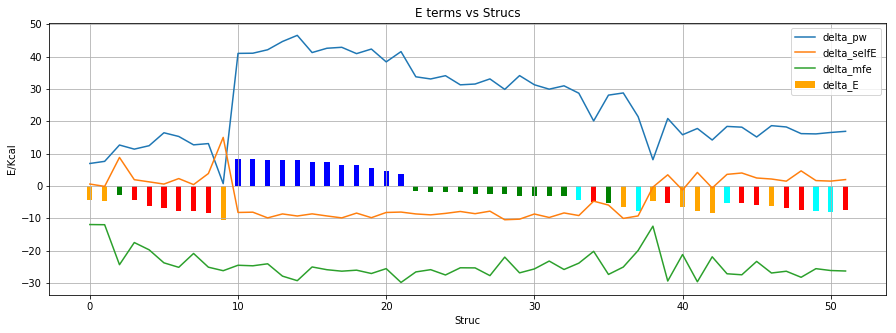

In [8]:
#plot the Energy terms vs structure
#categorize each strucs as [xry: bule, p1/dddro : orange, p2/pddro : red, p3/ppdro: green, p4/dpdro: cyan ]

#marker= ['^','o','v','X','s','*','<']
x_label=strucs

plt.figure()
plt.figure(figsize=(15, 5))
#plt.xticks(list(range(len(strucs))),x_label)
data=[strucs, E3, E4,E3_crgstate, E4_crgstate, diff_crgstate, deltaE,deltapw, deltaselfE, deltamfe]
#print(list(zip(*data)))
sorted_data2=sorted(list(zip(*data)), key= lambda x:(x[5], x[6]), reverse=True)
#print(sorted_data)
sorted_data2=list(zip(*sorted_data2))

##color each structure
color_map={"p10": "orange", "dddro": "orange", "p20": "red", "pddro": "red", "p30": "green", "ppdro": "green",\
           "p40": "cyan","dpdro": "cyan"}
colors=[]
for j in range(len(sorted_data2[0])):
    for key, value in color_map.items(): 
        if key in sorted_data2[0][j]:
            colors.append(value)
            break
    if all(key not in sorted_data2[0][j] for key in color_map):
        colors.append("blue")


print(sorted_data2[5])
labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
plt.bar(list(range(len(sorted_data2[6]))), sorted_data2[6], width, label= labels[0], color=colors)
for i,datai in enumerate(sorted_data2[7:]):    
    plt.plot(datai,label= labels[i+1], alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True)
plt.show()



[1.5, 8.5, 9.5, 37.5, 42.5, 50.5]
['0101-10', '010000', '01-1010', '001000', '000100', '000010', '000001']


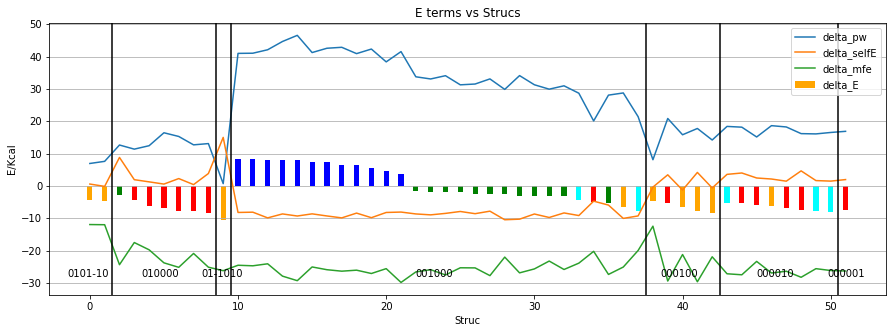

In [9]:
#category by which residue get protonated
x_label=strucs

plt.figure()
plt.figure(figsize=(15, 5))
#plt.xticks(list(range(len(strucs))),x_label)
data=[strucs, E3, E4,E3_crgstate, E4_crgstate, diff_crgstate, deltaE,deltapw, deltaselfE, deltamfe]
#print(list(zip(*data)))
sorted_data2=sorted(list(zip(*data)), key= lambda x:(x[5], x[6]), reverse=True)
sorted_data2=list(zip(*sorted_data2))

#get the division line for each category
vlines=[]
vline_labels=[]
for i,x in enumerate(sorted_data2[5][:-1]):
    if sorted_data2[5][i] !=sorted_data2[5][i+1]:
        vlines.append(i+0.5)
        vline_labels.append(sorted_data2[5][i])
vline_labels.append(sorted_data2[5][-1])
print(vlines)
print(vline_labels)

labels=["delta_E","delta_pw", "delta_selfE", "delta_mfe"]
plt.bar(list(range(len(sorted_data2[6]))), sorted_data2[6], width, label= labels[0], color=colors)
for i,datai in enumerate(sorted_data2[7:]):    
    plt.plot(datai,label= labels[i+1], alpha=1)
    plt.legend()
    #plt.ylim(-5.0,2.0)
for i, xc in enumerate(vlines):
    plt.axvline(x=xc, color='k', linestyle='-')
    if i==0: plt.text(vlines[i]-3,-28,vline_labels[i])
    else: plt.text((vlines[i-1]+vlines[i])/2-1.5,-28,vline_labels[i])
plt.text((len(sorted_data2[6])+vlines[-1])/2-1.5,-28,vline_labels[-1])
plt.title('E terms vs Strucs')
plt.xlabel('Struc')
plt.ylabel('E/Kcal')
plt.grid(True, axis='y')
plt.savefig(outputpathway+'/'+'All_strucs_cat_E_f3.png', dpi=300)
plt.show()

